In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)


In [2]:
type(mnist)


sklearn.utils.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline 

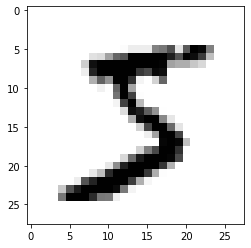

In [7]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")



In [8]:
y[0]

'5'

In [9]:
import numpy as np
y = y.astype(np.uint8)

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Train a binary classifier first


In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.linear_model import SGDClassifier
SGDClassifier?


In [13]:
sgd_clf = SGDClassifier(shuffle=True, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

## Evaluation


### Implementing Cross validation


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)



/Users/aman.jain/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [16]:
skfolds.get_n_splits()

3

In [17]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # print("train_index: {} and test_index: {}", len(train_index), len(test_index))
    sgd_clf_clone = clone(sgd_clf)
    xt, xtest, yt,ytest = X_train[train_index], X_train[test_index], y_train_5[train_index], y_train_5[test_index]
    
    sgd_clf_clone.fit(xt, yt)
    ypredicted = sgd_clf_clone.predict(xtest)
    n_correct = sum(ypredicted == ytest)
    print(n_correct / len(ypredicted))
    

0.95035
0.96035
0.9604


In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3)
scores

array([0.95035, 0.96035, 0.9604 ])

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [22]:
y_train_pred.shape

(60000,)

In [23]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [24]:
y_train_5.shape


(60000,)

In [25]:
from sklearn.metrics import precision_score

precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [26]:
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred)


0.6511713705958311

In [27]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [28]:
y_pred_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_pred_scores)

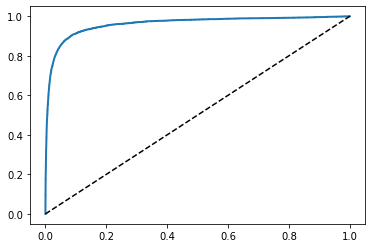

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr, tpr)


In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_pred_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_proba_predict = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [33]:
y_scores_forest = y_proba_predict[:, 1]

In [34]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multi-class classification


In [37]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [39]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [41]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [42]:
np.argmax(some_digit_scores)

5

In [43]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm


array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]])

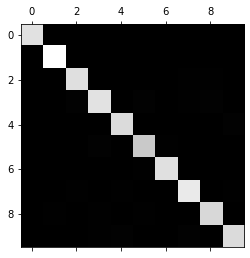

In [48]:
plt.matshow(cm, cmap=plt.cm.gray)

In [49]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm/ row_sums

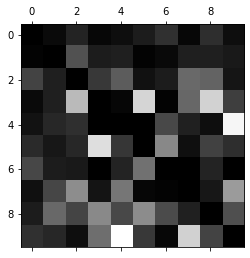

In [50]:
np.fill_diagonal(norm_cm,0)
plt.matshow(norm_cm, cmap=plt.cm.gray)

### Scikit learn uses one-vs-one classifier by default.

## Multi-class classifier 
## Multi-label classifier - > each data point can have multi labels
## Multioutput classifier


In [58]:
!pip install ipython-autotime
%load_ext autotime

time: 478 µs (started: 2021-04-27 11:09:56 +09:00)


## Exercises


### KNeighbors Classifier 


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knn_clf = OneVsRestClassifier(KNeighborsClassifier())
knn_clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier())

time: 2min 43s (started: 2021-04-27 11:11:40 +09:00)


In [60]:
cross_val_score(knn_clf, X_train, y_train, cv=3)

KeyboardInterrupt: 

time: 21min 11s (started: 2021-04-27 11:33:01 +09:00)


In [ ]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_
